In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
# import imageio

In [2]:
imagenes = glob.glob('../figs/obstacle/*.png')
imagenes.sort()
imagenes

['../figs/obstacle/u_norm_173.png',
 '../figs/obstacle/u_norm_174.png',
 '../figs/obstacle/u_norm_175.png',
 '../figs/obstacle/u_norm_176.png',
 '../figs/obstacle/u_norm_177.png',
 '../figs/obstacle/u_norm_178.png',
 '../figs/obstacle/u_norm_179.png',
 '../figs/obstacle/u_norm_180.png',
 '../figs/obstacle/u_norm_181.png',
 '../figs/obstacle/u_norm_182.png',
 '../figs/obstacle/u_norm_183.png',
 '../figs/obstacle/u_norm_184.png',
 '../figs/obstacle/u_norm_185.png',
 '../figs/obstacle/u_norm_186.png',
 '../figs/obstacle/u_norm_187.png',
 '../figs/obstacle/u_norm_188.png',
 '../figs/obstacle/u_norm_189.png',
 '../figs/obstacle/u_norm_190.png',
 '../figs/obstacle/u_norm_191.png',
 '../figs/obstacle/u_norm_192.png']

In [3]:
img = imread("../figs/obstacle/u_norm_173.png")
img_bw = np.mean(img,-1)

In [4]:
img_bw.shape

(894, 4800)

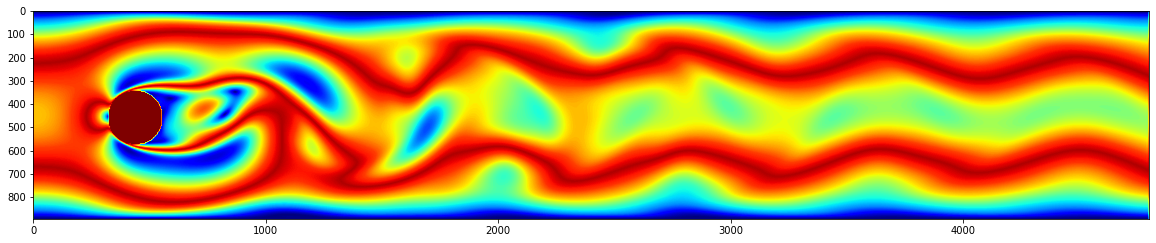

In [5]:
fig, ax = plt.subplots(figsize=(20,4))
ax.imshow(img_bw,cmap="jet")

In [6]:
# convert -delay 50 -loop 0 'X_r*.png' prueba.gif

In [7]:
img_bw.flatten().shape

(4291200,)

In [8]:
imagenes = glob.glob('../figs/obstacle/*.png')
imagenes.sort()
matriz = []
for imagen in imagenes:
    tmp = imread(imagen)
    tmp_bw = np.mean(tmp,-1)
    tmp_bw = tmp_bw.flatten()
    matriz.append(tmp_bw)
matriz = np.array(matriz)
matriz = matriz.T

In [9]:
matriz.shape

(4291200, 20)

In [10]:
U, S, VT = np.linalg.svd(matriz,full_matrices=False)
S = np.diag(S)

In [11]:
U.shape

(4291200, 20)

In [12]:
S.shape

(20, 20)

In [13]:
VT.shape

(20, 20)

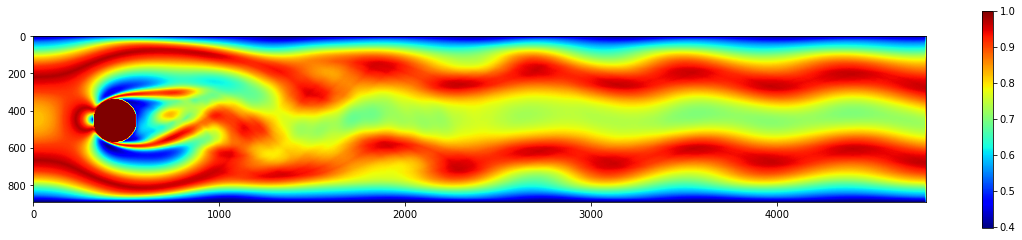

In [14]:
r = 2
Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
fig, ax = plt.subplots(figsize=(20,4))
img = ax.imshow(Xapprox[:,0].reshape(894, 4800),cmap='jet')
fig.colorbar(img)

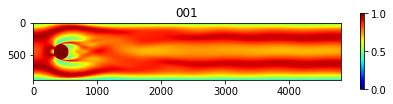

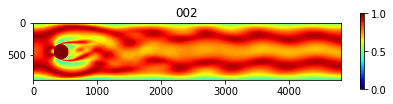

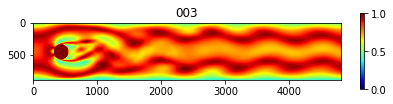

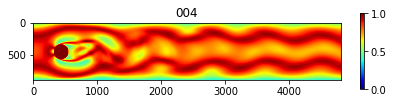

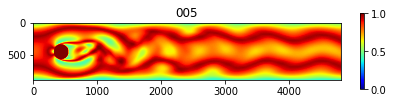

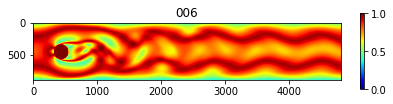

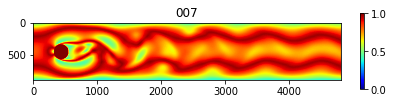

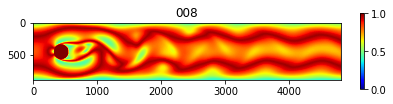

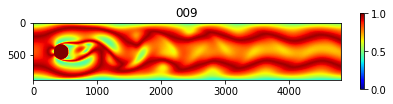

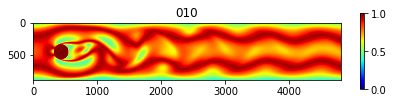

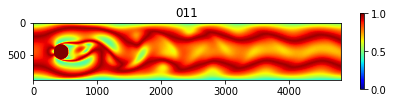

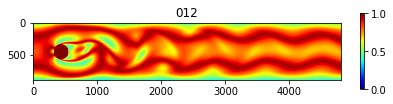

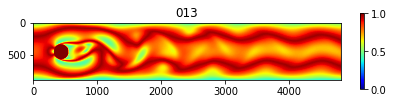

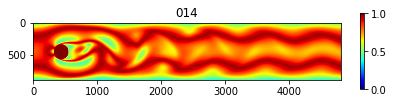

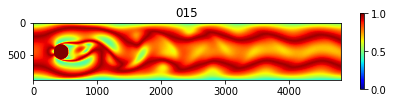

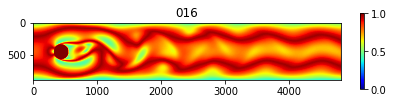

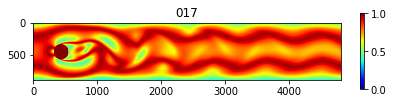

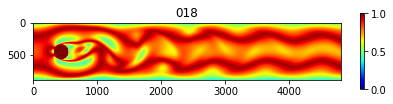

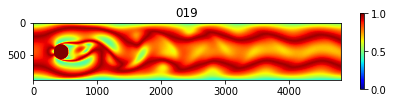

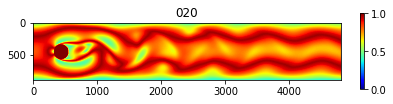

In [23]:
for r in range(1,21):
    Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
    fig, ax = plt.subplots(figsize=(6,1.5))
    img = ax.imshow(Xapprox[:,0].reshape(894, 4800),cmap='jet',vmin=0,vmax=1.)
    nombre = str(r).zfill(3)
    ax.set_title(nombre)
    fig.colorbar(img)
    name = '../figs/obstacle/gifs/X_r' + nombre +".png"
    fig.tight_layout()

    fig.savefig(name,transparent=False)
# !convert -delay 50 -loop 0 'X_r*.png' prueba.gif



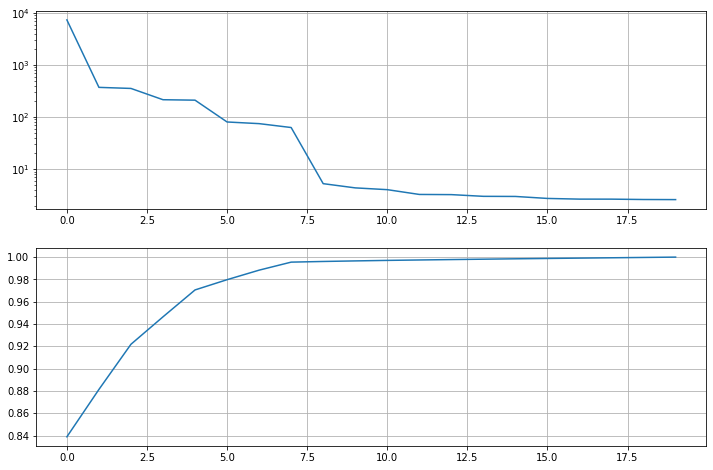

In [24]:
fig, ax = plt.subplots(2,figsize=(12,8))

ax[0].semilogy(np.diag(S))

ax[1].plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))


for i in range(2):
    ax[i].grid()

In [25]:
print(U.shape,S.shape,VT.shape)

(4291200, 20) (20, 20) (20, 20)


# Visualiza la aproximaci'on y la original

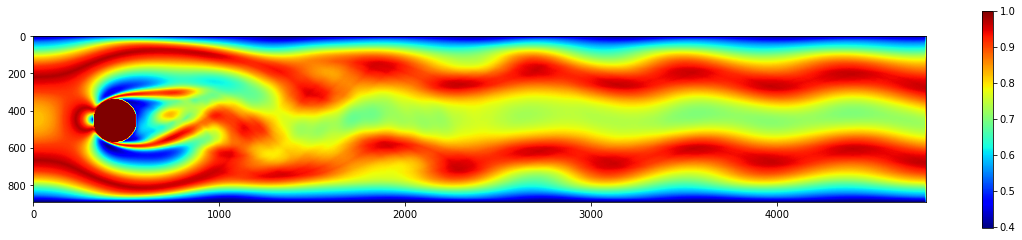

In [29]:
r = 2
Xapprox = U[:,:r] @ S[:r,:r] @ VT[:r,:]
fig, ax = plt.subplots(figsize=(20,4))
img = ax.imshow(Xapprox[:,0].reshape(894, 4800),cmap='jet')
fig.colorbar(img)

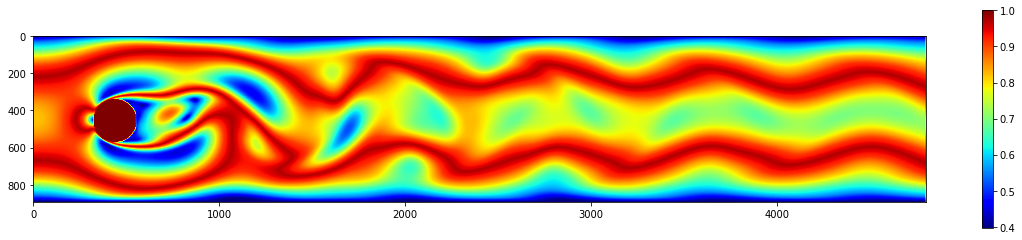

In [28]:
fig, ax = plt.subplots(figsize=(20,4))
img = ax.imshow(img_bw,cmap='jet')
fig.colorbar(img)

## Calcula la diferencia m'axima/promedio entre original y Xap

4.172325134277344e-05

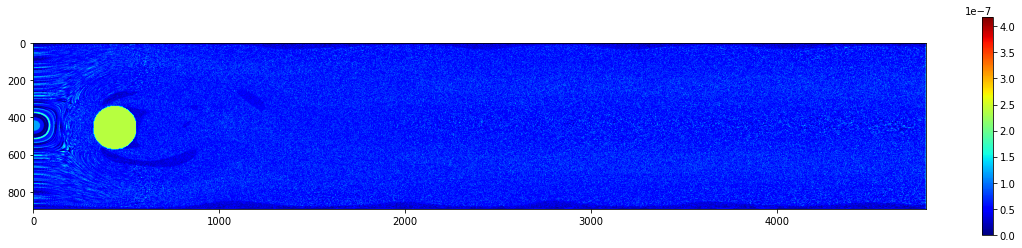

In [32]:
# Diferencia entre la matriz truncada a "r" y la original
r = 20
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
fig, ax = plt.subplots(figsize=(20,4))
img = ax.imshow(np.abs(img_bw-Xapprox[:,0].reshape(894, 4800)),cmap='jet')
# img = ax.imshow(img_bw-Xapprox[:,0].reshape(894, 4800),cmap='jet')
fig.colorbar(img)
np.max(np.abs(img_bw-Xapprox[:,0].reshape(894, 4800)))*100


# Verifica los 20 componentes de cada snapshot

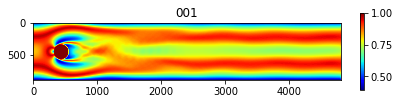

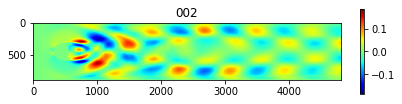

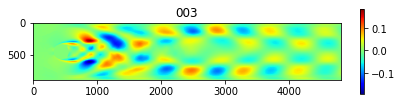

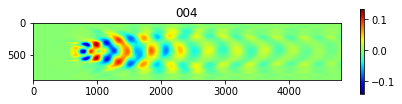

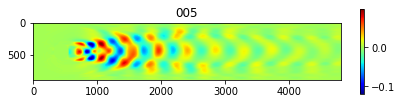

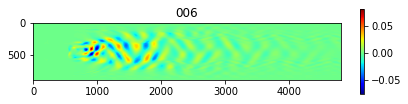

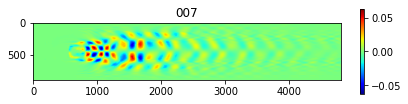

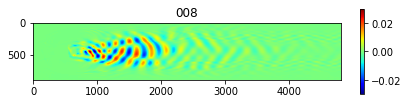

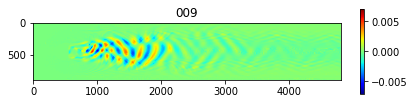

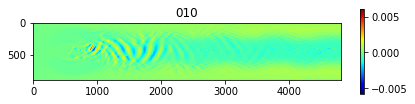

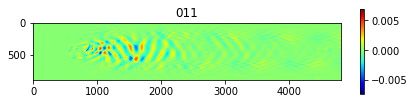

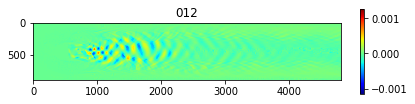

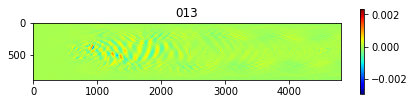

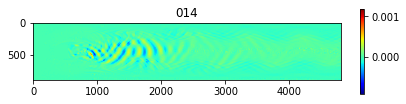

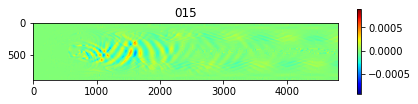

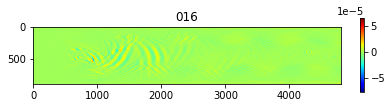

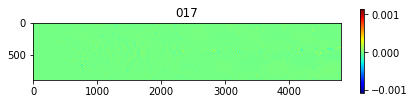

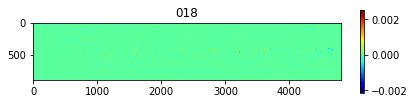

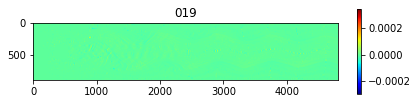

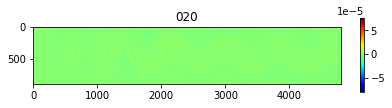

In [48]:
for r in range(1,21):
    Xapprox = U[:,r-1:r] @ S[r-1:r,r-1:r] @ VT[r-1:r,:]
    fig, ax = plt.subplots(figsize=(6,1.5))
    img = ax.imshow(Xapprox[:,0].reshape(894, 4800),cmap='jet')
    fig.colorbar(img)
    
    nombre = str(r).zfill(3)
    ax.set_title(nombre)
    name = '../figs/obstacle/gifs/Xmodes_r' + nombre +".png"
    fig.tight_layout()
    fig.savefig(name,transparent=False)

In [ ]:
r = 20
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
fig, ax = plt.subplots(figsize=(20,4))
img = ax.imshow(Xapprox[:,0].reshape(894, 4800),cmap='jet')
fig.colorbar(img)

In [ ]:
# calcula el error m'aximo
r = 7
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
np.max(np.abs(img_bw-Xapprox[:,0].reshape(894, 4800)))*100


In [ ]:
r = 10
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
fig, ax = plt.subplots(figsize=(20,80))
ax.imshow(Xapprox[:,2].reshape(894, 4800))

In [ ]:
fig, ax = plt.subplots(20,figsize=(20,80))
r = 1

Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
for i in range(20):
    ax[i].imshow(Xapprox[:,i].reshape(894, 4800))

In [ ]:
fig, ax = plt.subplots(20,figsize=(20,80))
r = 1

Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
for i in range(20):
    ax[i].imshow(Xapprox[:,i].reshape(894, 4800)-Xapprox[:,0].reshape(894, 4800))

In [ ]:
fig, ax = plt.subplots(20,figsize=(20,80))
r = 2

Xapprox = U[:,r-1:r] @ S[r-1:r,r-1:r] @ VT[r-1:r,:]
for i in range(20):
    ax[i].imshow(Xapprox[:,i].reshape(894, 4800))

In [ ]:
fig, ax = plt.subplots(20,figsize=(20,80))
r = 12

Xapprox = U[:,r-1:r] @ S[r-1:r,r-1:r] @ VT[r-1:r,:]
for i in range(20):
    ax[i].imshow(Xapprox[:,i].reshape(894, 4800))

In [ ]:
fig, ax = plt.subplots(19,figsize=(20,80))

for r in range(1,19):
    Xapprox = U[:,r-1:r] @ S[r-1:r,r-1:r] @ VT[r-1:r,:]
    ax[r-1].imshow(Xapprox[:,0].reshape(894, 4800))